In [2]:
#Importing libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# All classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
data = pd.read_csv('../datasets/Crop_Recommendation.csv')

In [4]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
#Defining features and target

X = data.drop(['Crop'], axis=1)
le = LabelEncoder()
y = le.fit_transform(data['Crop']) #Encoding the crop names

In [6]:
for i, class_name in enumerate(le.classes_):
    print(f"{i} → {class_name}")

0 → Apple
1 → Banana
2 → Blackgram
3 → ChickPea
4 → Coconut
5 → Coffee
6 → Cotton
7 → Grapes
8 → Jute
9 → KidneyBeans
10 → Lentil
11 → Maize
12 → Mango
13 → MothBeans
14 → MungBean
15 → Muskmelon
16 → Orange
17 → Papaya
18 → PigeonPeas
19 → Pomegranate
20 → Rice
21 → Watermelon


In [7]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian NB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)  # To suppress logs
}


 Model: Logistic Regression

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00    

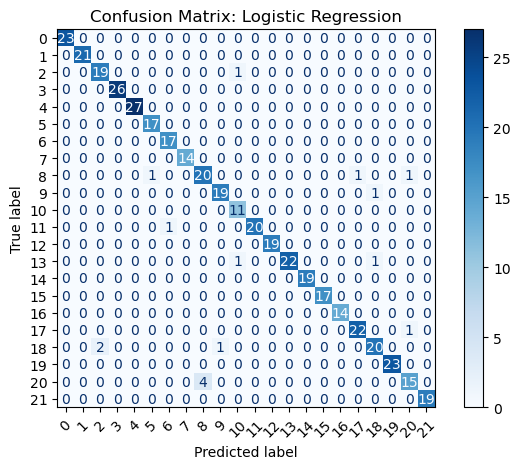


 Model: Gaussian NB

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00  

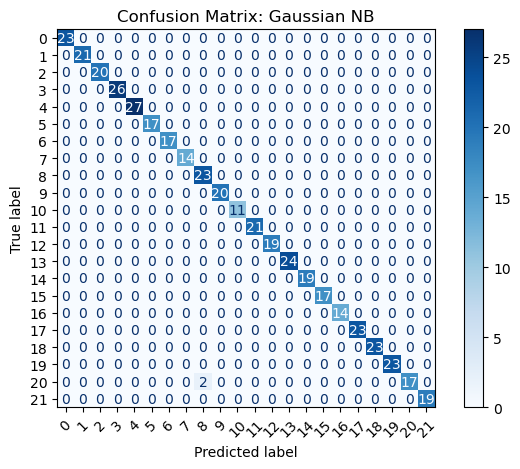


 Model: Decision Tree

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       0.93      1.00

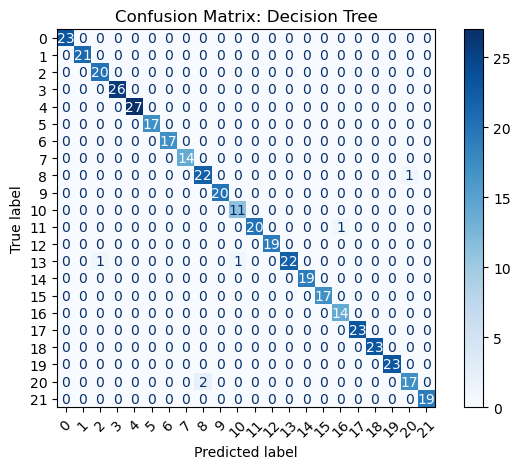


 Model: Random Forest

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00

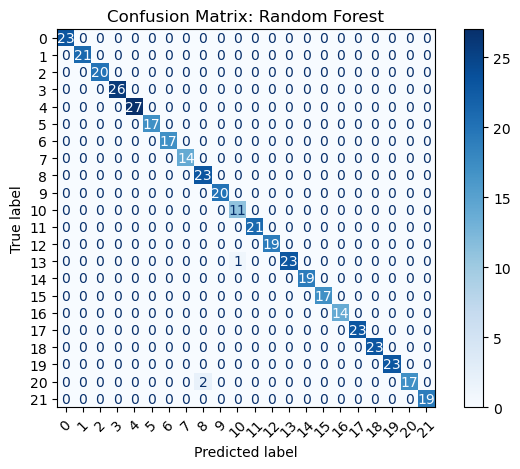


 Model: Extra Trees

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00  

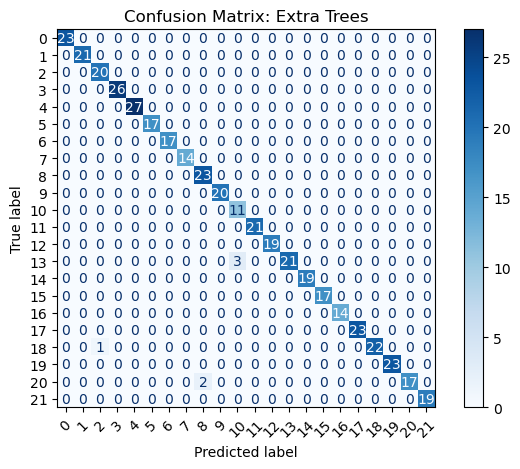


 Model: Gradient Boosting

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      

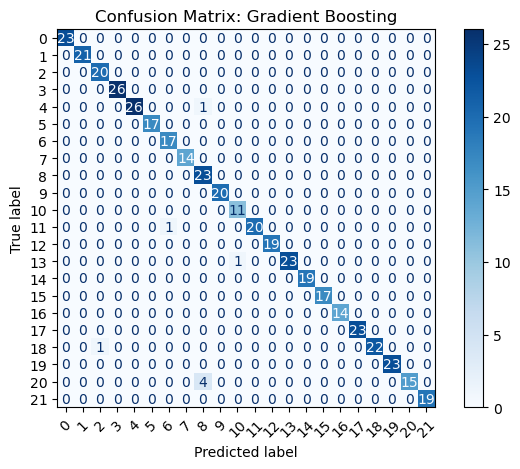


 Model: AdaBoost

 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        17
           7       0.38      1.00      0.55        14
           8       0.00      0.00      0.00        23
           9       0.43      1.00      0.61        20
          10       0.03      1.00      0.06        11
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        24
          14       0.00      0.00      0.00        19
          15       1.00      1.00      1.00        17
          16       0.00      0.00     

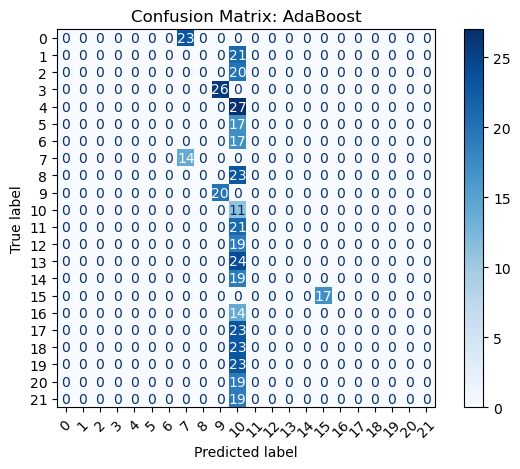


 Model: Bagging

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

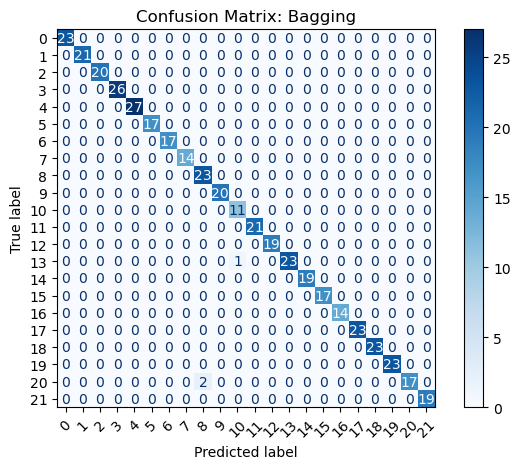


 Model: KNN

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.90      0.95        21
          12       0.90      1.00      0.95        19
          13       1.00      0.83      0.91        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

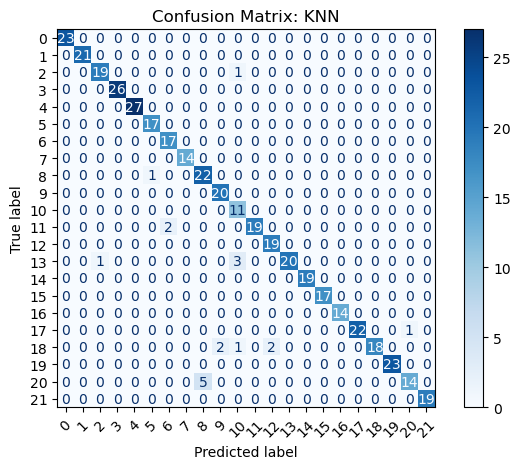


 Model: SVC

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

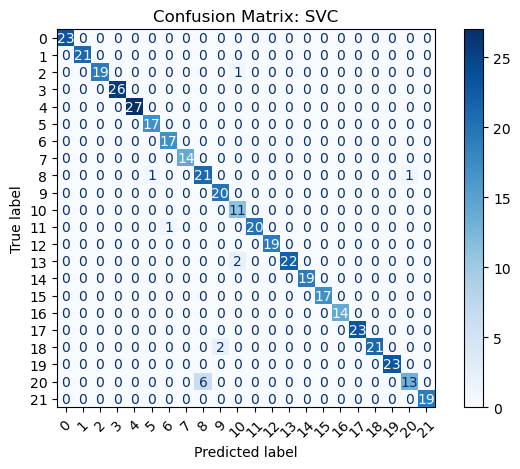


 Model: LightGBM

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

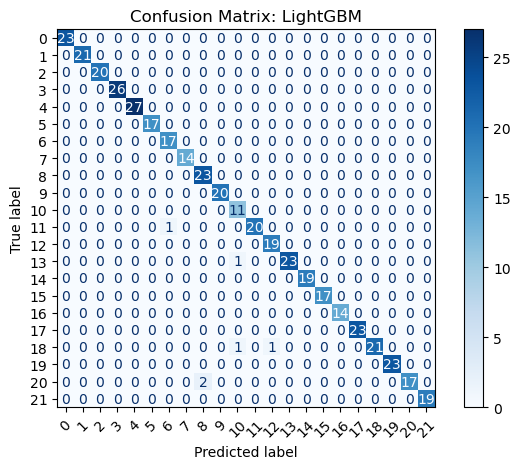


 Model: XGBoost

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

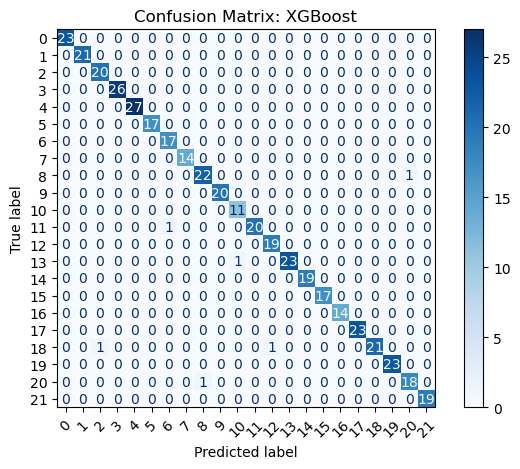


 Model: CatBoost

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

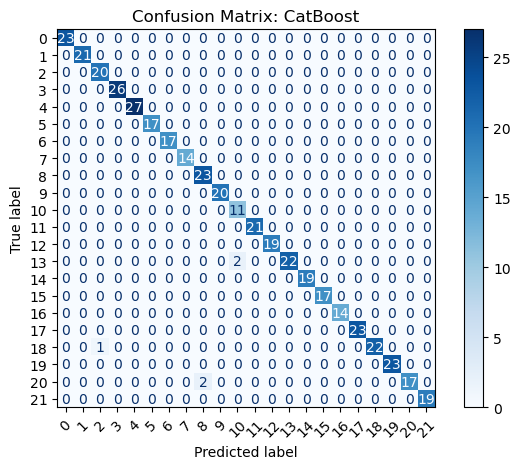


 Model Comparison (sorted by F1 Score):


,Model,Accuracy,Precision,Recall,F1 Score
1,Gaussian NB,0.995455,0.995818,0.995455,0.995423
3,Random Forest,0.993182,0.993735,0.993182,0.993175
7,Bagging,0.993182,0.993735,0.993182,0.993175
12,CatBoost,0.988636,0.989808,0.988636,0.988698
4,Extra Trees,0.986364,0.988297,0.986364,0.986516
10,LightGBM,0.986364,0.987666,0.986364,0.986428
11,XGBoost,0.986364,0.986901,0.986364,0.986347
2,Decision Tree,0.986364,0.986876,0.986364,0.986334
5,Gradient Boosting,0.981818,0.984271,0.981818,0.981851
9,SVC,0.968182,0.971517,0.968182,0.968027


In [10]:
results = []

for name, model in models.items():
    print(f"\n Model: {name}")
    
    # Training and prediction
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Save to results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
    })

    # Print classification report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Confusion Matrix: {name}')
    plt.tight_layout()
    plt.show()

# Convert to DataFrame and display sorted results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\n Model Comparison (sorted by F1 Score):")
display(results_df)

Stacking

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

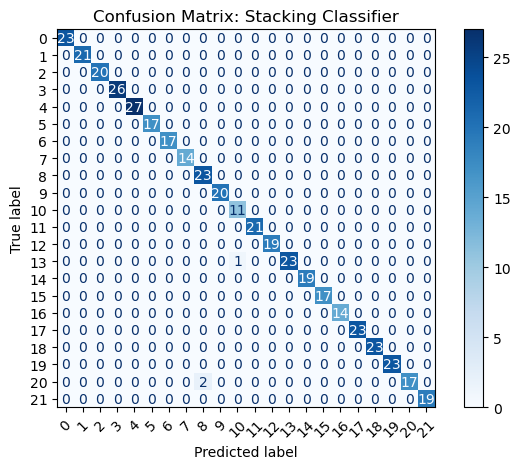

In [34]:
from sklearn.ensemble import StackingClassifier

#Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('gnb', GaussianNB()),  
    ('bag', BaggingClassifier(n_estimators=100, random_state=42))
]

# Meta learner
meta_model = LogisticRegression()

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # number of folds for cross-validation
    passthrough=False,  # if True, passes original features too
    n_jobs=-1
)

# Fit and predict
stacking_clf.fit(X_train_scaled, y_train)
y_pred = stacking_clf.predict(X_test_scaled)

#Evaluate performance

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.6f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_clf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix: Stacking Classifier')
plt.tight_layout()
plt.show()